# Name - Subhajyoti Saha, Roll - 21111269

# 1) Perceptron Algorithm

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from numpy.random import seed
from numpy.random import randint
seed(1)

## a) Code of Perceptron Algorithm    (10 Marks)
 Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation as
in the slides. [10 points]


In [ ]:
def predict(data, weight ):
    #Predict whether the data is positive or negative 
    t1 = 0
    for i in range(data.shape[1]):
        t1 = t1 + weight[i] * data.iloc[0,i].item()
    # Now t1 store the value of w^T * data
    #Now the sign of the data will denote whether from positiva or negative class
    if t1 >= 0:
        return 1
    else:
        return 0    
    


    
def train_perceptron (x_train, y_train, learn_rate, n_epoch) : 
    
    """The code defines how to train a sinhgle layer perceptron network with the notation similar to given in the slides."""
    
    weight = [ 0.5 for i in range(  x_train.shape[1])] #Initializing the weights
    
    for t in range( n_epoch):
        
        index = randint(0, x_train.shape[0], 1)  
        prediction = predict(x_train.iloc[index, :], weight) #Do the initial prediction
        
        #Changing the predicted output to -1 if the class was 0 for the ease of 
        #calculation of the error condition of the oerceptron algorithm
        
        if y_train.iloc[index].item() == 0:
            t1 = -1
        else:
            t1 = 1
    
        if prediction == 0:
            prediction = -1
        else:
            prediction = 1
            
        if (t1 * prediction) < 0 : # An error has occured
            
            #Updating weight
            weight = np.add(weight , t1* x_train.iloc[index, :].to_numpy().reshape(x_train.shape[1]))
            
            
    return weight
                

## b)
Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess
the dataset to handle missing and anomalous data. [10 points]


In [ ]:
df=pd.read_csv("./banknote_authentication_data.txt")

In [ ]:
df.columns = ['variance','skewness','curtosis','entropy','class']

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The above shows that all the five features are continous.

In [ ]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

The above shows that there is no NULL value in our data set.

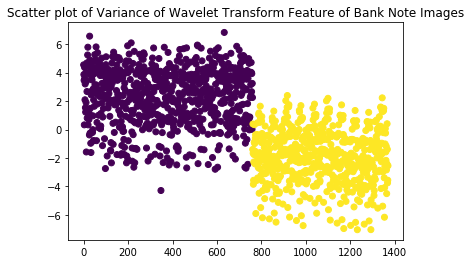

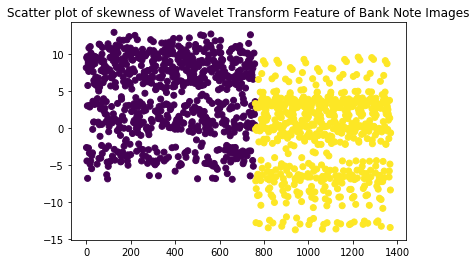

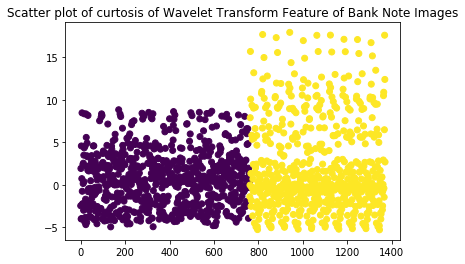

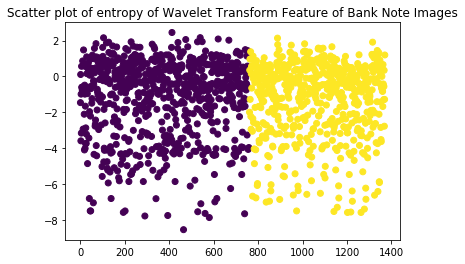

In [ ]:
#Plotting Various continiopus features before ormalizing
plt.scatter(list(range(df['variance'].shape[0])), df['variance'], c = df['class'])
plt.title('Scatter plot of Variance of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['skewness'].shape[0])), df['skewness'], c = df['class'])
plt.title('Scatter plot of skewness of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['curtosis'].shape[0])), df['curtosis'], c = df['class'])
plt.title('Scatter plot of curtosis of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['entropy'].shape[0])), df['entropy'], c = df['class'])
plt.title('Scatter plot of entropy of Wavelet Transform Feature of Bank Note Images')
plt.show()

As we can see from the above plots, the Y-axis values denote the values taken by the i-th number of row i.e. x-values. As we can not separate the two classes bnased on any fixed y-value on any features, we can conclude safely that  the data set is not linearly separable based on th individual features vlues.

In [ ]:
#Normalizing the columns

df['variance'] = (df['variance'] - df['variance'].min()) / (df['variance'].max() - df['variance'].min())
df['skewness'] = (df['skewness'] - df['skewness'].min()) / (df['skewness'].max() - df['skewness'].min())
df['curtosis'] = (df['curtosis'] - df['curtosis'].min()) / (df['curtosis'].max() - df['curtosis'].min())
df['entropy'] = (df['entropy'] - df['entropy'].min()) / (df['entropy'].max() - df['entropy'].min())
df.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.538946,0.587117,0.288056,0.668867,0.444931
std,0.204984,0.219586,0.185672,0.191102,0.497139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379854,0.451335,0.160801,0.557498,0.000000
50%,0.543583,0.601934,0.254280,0.723929,0.000000
75%,0.710811,0.770306,0.364775,0.813171,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


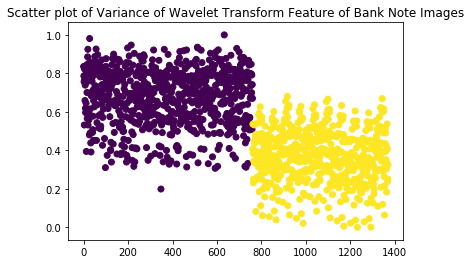

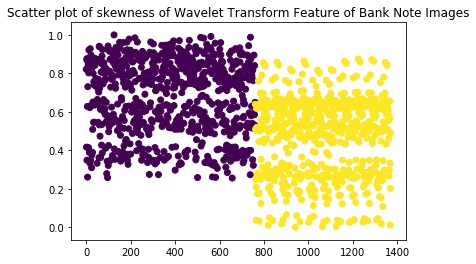

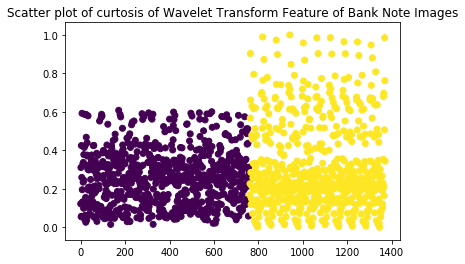

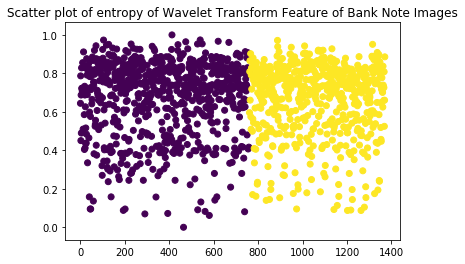

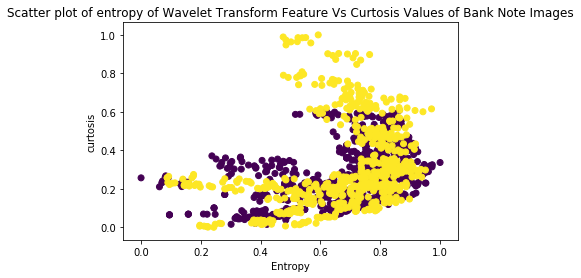

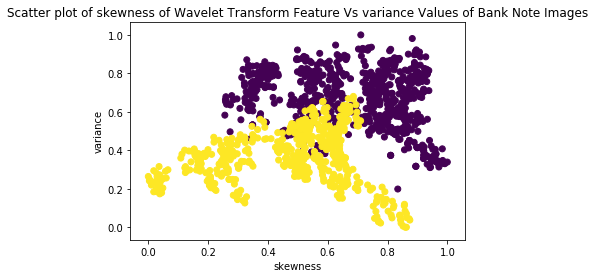

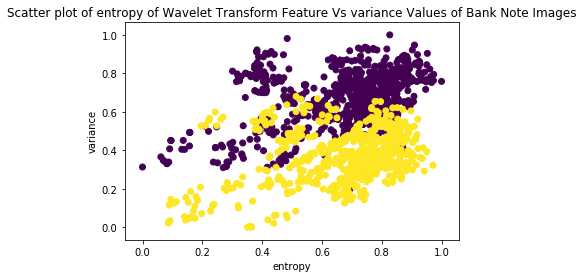

In [ ]:
#Plotting Various continiopus features After Normalizing
plt.scatter(list(range(df['variance'].shape[0])), df['variance'], c = df['class'])
plt.title('Scatter plot of Variance of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['skewness'].shape[0])), df['skewness'], c = df['class'])
plt.title('Scatter plot of skewness of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['curtosis'].shape[0])), df['curtosis'], c = df['class'])
plt.title('Scatter plot of curtosis of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(range(df['entropy'].shape[0])), df['entropy'], c = df['class'])
plt.title('Scatter plot of entropy of Wavelet Transform Feature of Bank Note Images')
plt.show()
plt.scatter(list(df['entropy']), df['curtosis'], c = df['class'])
plt.title('Scatter plot of entropy of Wavelet Transform Feature Vs Curtosis Values of Bank Note Images')
plt.xlabel('Entropy')
plt.ylabel('curtosis')
plt.show()
plt.scatter(list(df['skewness']), df['variance'], c = df['class'])
plt.title('Scatter plot of skewness of Wavelet Transform Feature Vs variance Values of Bank Note Images')
plt.xlabel('skewness')
plt.ylabel('variance')
plt.show()
plt.scatter(list(df['entropy']), df['variance'], c = df['class'])
plt.title('Scatter plot of entropy of Wavelet Transform Feature Vs variance Values of Bank Note Images')
plt.xlabel('entropy')
plt.ylabel('variance')
plt.show()

As we see in the above pictures Normalizing any columns does not change the geometric propertis of the data set, rather normalizing makes the numerical values of all column in s similar range, which will help ful during gradient calculation. The data set is not even linearly separable based on the two features taking together.

## c) Training on Cross Validated Dataset
 Train the algorithm on the dataset using cross-validation and report cross-validated test set error
[10 points]


In [ ]:
#We shall be implementing a k fold cross validation. 

def train_perceptron_with_cross_validation(df, k = 20, learn_rate = 0.01, epoch = 50):
    
    #The algo return the array of cross validated accuracy as well as the variance of it
    
    df = df.sample(frac=1).reset_index(drop=True) #Randomizing the frame
    n = int(df.shape[0]/k) #Distributing the smaple into k parts for cross valkidation
    acc = np.empty((k, 1), dtype = float)
    f1 = 0
    weight_list = [[0,0, 0, 0]]
    
    for i in range(k) :
        #Loops for each set of cross validation
        val_index = list(range( (i*n), (i+1)*n if (i+1)*n <= df.size else df.size ))
        
        xy_train = df.drop(labels = val_index, axis = 0) 
        x_train = xy_train.iloc[:, :-1]
        y_train = xy_train.iloc[:, -1]
        x_val = df.iloc[val_index, :-1]
        y_val = df.iloc[val_index, -1]
        weight= train_perceptron(x_train, y_train, learn_rate, epoch) #Training the perceptron algo
        weight_list.append(weight)
       
        accuracy = 0
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        for t in range(y_val.shape[0]):
            
            y_predict = predict(x_val.iloc[[i],:], weight) #Doing the predictiom on the learned weights
            
            if y_predict == y_val.iloc[t]:
                tp = tp + 1
                accuracy = accuracy + 1
            elif y_predict == 1 and y_val.iloc[t] == 0:
                fp = fp + 1
            elif y_predict == 0 and y_val.iloc[t] == 1:
                fn = fn + 1
            else:
                tn = tn + 1
                accuracy = accuracy + 1

        p = tp / (tp + fp)
        r = tp / (tp + fn)
        f1 = f1 + 2 / ( (1/p) + (1/r))
        
        acc[i] = (accuracy / y_val.shape[0]) * 100
        
        
    acc_var = (1/k) * np.sum((acc - np.mean(acc)) ** 2)
    f1 = f1 / k
    mean_weight = np.mean(weight_list, axis = 0)
    cov = np.cov(np.transpose(weight_list))
    
    return np.mean(acc) , acc_var, f1, mean_weight, cov                        

In [ ]:
mean_accuracy, var_accuracy, f1_score, mean_weight, cov_weight = train_perceptron_with_cross_validation(df, 10, 0.01, 1000 )

print('The Mean Accuracy of the algorithm is ' + str(mean_accuracy))
print('The variation of accuracy is ' + str(var_accuracy))
print('The F1 Score is ' + str(f1_score))
print('The Mean Weight is ' + str(mean_weight))
print('The Covariance Matrix is ' + str(cov_weight))

The Mean Accuracy of the algorithm is 51.240875912408754
The variation of accuracy is 35.7824071607438
The F1 Score is 0.6755264409800216
The Mean Weight is [-4.83065738  0.17288329 -0.70186499  3.35409916]
The Covariance Matrix is [[ 2.68061833 -0.1952751   0.37826187 -1.78802419]
 [-0.1952751   0.2597511  -0.01312905 -0.00822603]
 [ 0.37826187 -0.01312905  0.20150202 -0.21260959]
 [-1.78802419 -0.00822603 -0.21260959  1.39363359]]


The values in the Covariance of Weights is too hugh  that denotes the weights are varying too much. The Variation of Accuracy is also around 42, which denotes that the model is not too much confident about its prediction across the k - cross validate dpreediction. It denotes the inefficiency of our model on the data set.That implies the data set is nbot linearly separable on all the features. Earlier we ha shown that the data set is not kinearly separable based upon the individual features.

The accuracy arr is [50.2919708  49.7810219  48.17518248 51.24087591 55.47445255 49.41605839
 48.97810219]
The best accuracy 55.474452554744516 is obtained at the learning rate 10


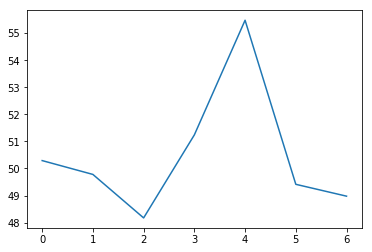

In [ ]:
# Finding optimum learning rate
learn_rate = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc = np.empty((7, ))
accuracy = 0

for i in range(7):
    acc[i], _, _ , _, _ = train_perceptron_with_cross_validation(df, k = 10, learn_rate = learn_rate[i], epoch = 10000)
print('The accuracy arr is ' + str(acc))
for i in range(7):
    if accuracy < acc[i]:
        accuracy = acc[i]
        best_learning_rate = learn_rate[i]
print('The best accuracy ' + str(accuracy) + ' is obtained at the learning rate ' + str(best_learning_rate))

plt.plot([0,1,2,3,4,5,6], acc)
plt.show()


## d)
 Ensure you use a held out validation set and report F1 score on the held out set for your best
model [5 points]

In [ ]:
# The Best Learning Rate is stored in best_)learning_rate

#Forming the Validation Set
validation_set = df.sample(frac = 0.1, random_state = 200)
training_set = df.drop(validation_set.index)
validation_set = validation_set.reindex(range(validation_set.shape[0]))
training_set = training_set.reindex(range(training_set.shape[0]))

# Training the model on the training set
_, _, _, mean_trained_weight, _ = train_perceptron_with_cross_validation(traing_set, k = 20, learn_rate = best_learning_rate, epoch = 50)

prediction = np.empty(validation_set.shape[0])

#Prediction on the Validation set
for i in range(validation_set.shape[0]):
    prediction[i] = predict(validation_set.iloc[[i], :-1], mean_trained_weight)

#caalcculating F1 score
tp = 0
tn = 0
fp = 0
fn = 0
accuracy = 0
for t in range(validation_set.shape[0]):
    if prediction[t] == validation_set.iloc[t, -1]:
            tp = tp + 1
            accuracy = accuracy + 1
    elif prediction[t] == 1 and validation_set.iloc[t, -1] == 0:
        fp = fp + 1
    elif prediction[t] == 0 and validation_set.iloc[t, -1] == 1:
        fn = fn + 1
    else:
        tn = tn + 1
        accuracy = accuracy + 1
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 =  2 / ( (1/p) + (1/r))
accuracy =( accuracy / validation_set.shape[0]) * 100
print('The accuracy on the validation set is ' + str(accuracy))
print('The F1 score on the Hold Out Validation Set is ' + str(f1))

The accuracy on the validation set is 100.0
The F1 score on the Hold Out Validation Set is 1.0


# Q2 ) Metropolish Hestings algorithm
## a)

Write a function to calculate the Bayesian posterior probability given 50 new data samples
drawn from a normal distribution with mean 10 and SD 5, assuming a normal prior with mean 25
and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how you
derive the likelihood from the data. [15 points]


In [1]:
def posterior(mu, data, n = 50, prior_mean = 25, sd = 5):
  # Calculate the posterior probability of specific Mu(the parameter) and return the value along with the mean and variance of the posterior distribution 
  avg = np.mean(data) #Mean of Likelihood
  posterior_mean = (prior_mean + n * avg) / (1 + n) #Posterior Mean depends upon this equation which is proved in the below
  posterior_variance = (sd**2) / ( n + 1 )  #Posterior Variance depends upon this equation which is proved in the below
  t1 = (1 / np.sqrt((2*3.14 * posterior_variance)))
  exponent = ((-1) * (mu - posterior_mean) ** 2 ) / (2 * posterior_variance)
  prob = t1 * np.exp(exponent)
  return prob, posterior_mean, np.sqrt(posterior_variance)


In [2]:
def prior(mu, prior_mean = 25, sd = 5):
  #Calculates the prior probability and return the value
  t1 = (1 / np.sqrt( 2 * 3.14 * sd**2))
  exponent = ((-1) * (mu - prior_mean) ** 2) / (2 * sd**2)
  prob = t1 * np.exp(exponent)
  return prob 

In [3]:
def likelihood(data, mu, n = 50, sd = 5):
  #Return the likelihood of a set of data observations, along with the likelihood_mean and likelihood_sd
  likelihood_var = (sd ** 2) / n
  likelihood_mean = np.mean(data)
  t1 = 1 / np.sqrt(2 * 3.14 * likelihood_var) 
  exponent = (-1) * ((mu - likelihood_mean)**2) / (2 * likelihood_var)
  prob = t1 * np.exp(exponent)
  return prob, likelihood_mean, np.sqrt(likelihood_var)

The Prior Mean and sd is given in the question as 25 and 5
The Likelihood Mean = 9.566672473394478And the Likelihood sd = 0.7071067811865476
The Posterior Mean = 9.869286738622037And the Likelihood sd = 0.7001400420140049


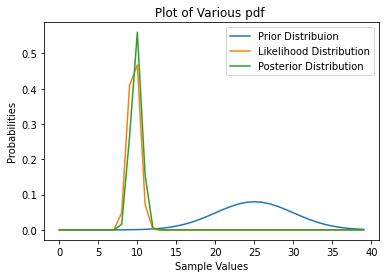

In [6]:
#Testing the three probability pdfs
data = np.random.normal(loc = 10, scale = 5, size = (50))
mu_values = np.array([i for i in range(0, 40)])
n = mu_values.size
prior_values = np.empty(( n))
likelihood_val = np.empty((n))
posterior_val = np.empty((n))
for i in range(n):
  prior_values[i] =  prior(mu_values[i])
  likelihood_val[i], likelihood_mean, likelihood_sd = likelihood(data, mu_values[i])
  posterior_val[i], posterior_mean, posterior_sd =  posterior(mu_values[i], data)

print('The Prior Mean and sd is given in the question as 25 and 5')
print('The Likelihood Mean = ' + str(likelihood_mean) + 'And the Likelihood sd = ' + str(likelihood_sd))
print('The Posterior Mean = ' + str(posterior_mean) + 'And the Likelihood sd = ' + str(posterior_sd))

plt.plot(mu_values, prior_values, label = "Prior Distribuion")
plt.plot(mu_values, likelihood_val, label = "Likelihood Distribution")
plt.plot(mu_values, posterior_val, label = "Posterior Distribution")
plt.xlabel('Sample Values')
plt.ylabel('Probabilities')
plt.title('Plot of Various pdf ')
plt.legend()
plt.show()

### Deriving the Likelihood probability distribution of the data from the individual sample's probability distribution

We are given that we have sampled 50 data from a normal distribution whose mean is 10 and standard deviation is 5, i.e. $ N(y_n | \mu = 10, \sigma = 5 )  $. $\newline$

Let's y denote all the 50 ndata samples. $\newline$

Let's 
Hence, f (y | $\mu , \sigma $) = $\prod_{i = 1}^{50} \frac{1}{\sqrt{2  \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}\left ( y_i - \mu\right)^2 } $ $\newline$

or, $\propto e^{-\frac{1}{2\sigma^2}\sum_{i}^{50}(y_i - \mu)^2 }$  $\newline$

or, $ \propto e^{-\frac{1}{2\sigma^2} \sum_{1}^{50}(y_i^2 + \mu^2 - 2y_i\mu))} $ $ \newline$

$\propto e^{-\frac{1}{2\sigma^2}(\sum_{i = 1}^{50} y_i^2 + n * \mu^2 - 2\mu\sum_{i = 1}^{50}y_i)}$ $\newline$

$\propto e^{-\frac{n}{2\sigma^2} (\mu^2 - 2 \mu \frac{1}{n}\sum_{i = 1}^{n}y_i) + \frac{1}{n}\sum_{1}^{n} y_i^2}$ $\newline$

As we know the multiple of normal distributions with fixed mean and standard dviation normal distribution is also normal but with a different mean and standsard deviation.  So, let's construct a normal distribution for likelihood with mean $\mu_{likelihood}$ and $\sigma_{likelihood}$.

Then, $f (y | \mu , \sigma )$ = $\frac{1}{\sqrt{2  \pi \sigma_{likelihood}^2}} e^{-\frac{1}{\sqrt{2\sigma_{likelihood}^2}}(\mu - \mu_{lielihood})^2}$ $\newline$

Now comparing the two probability distributions we get the likelihood's mean and standard deviation as $\newline$

$\mu_{likelihood} = \frac{1}{n} \sum_{i = 1}^{n} y_i$ $and  $ $\sigma_{likelihood} = \frac{\sigma}{\sqrt{n}}$. $\newline$

Thus we can see in the above how likelihood is derived from the data.


## b)
(b) Implement the Metropolis algorithm from the lecture slides to estimate the posterior distribution
given the same prior and data and show that it converges to the analytic posterior by plotting a
histogram of samples from the distribution alongside the analytic posterior distribution. Assume
whatever SD (width) you want for the proposal distribution. [15 points]


In [7]:
def metropolis_algo(width, original_posterior_mean, look_back=5, data = data, num_of_trials = 1000000, tol = 0.00001):
                                                                                                        
  samples = [1] # Starting Sampling from 1
  
  diff = 10000000000000
  num_accept = 0
  efficiency = 0
  convergence_step  = 0
  f = 0

  for i in range(num_of_trials):

    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], width)
    candidate_posterior, _, _ = posterior( candidate, data)
    sample_posterior, _, _ = posterior(samples[-1], data)
    #calculate probability of accepting this candidate
    prob = candidate_posterior / sample_posterior
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])
        #print(samples[-1])

    #Check for convergence and calculate the efficiency
    if i >= look_back : 
      #Just forming the data set
      diff = np.mean(samples[-look_back : ]) - original_posterior_mean   #Checking the difference of the expectation of last look_back coiunts of samples and the mean of original posterior distribution
      diff = (-1)*diff if diff < 0 else diff     #Taking modulus
    if diff <= tol and f == 0:
      #Checked the diff wrt certain sensibility
      burn_in = 1000 if i > 6000 else 0
      efficiency = round((num_accept - burn_in) / (i - burn_in), 3)
      convergence_step = i
      f =1

  burn_in = 1000
  retained_samples = samples[burn_in+1:]
  
  if f == 0:
    #All the iterations are completed to get the converge
    efficiency = round((num_accept - burn_in) / (num_of_trials - burn_in), 3)
    convergence_step = num_of_trials
  
  return retained_samples, efficiency, convergence_step


The efficiency of our MCMC sampling is 0.994
The convergence  of our MCMC sampling is acheived at  368449
 


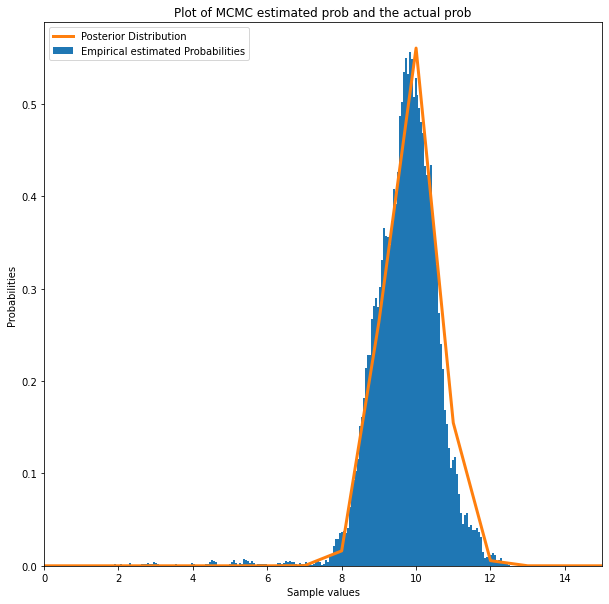

In [8]:
#Testing the Metropolis Hesting Algo and drawing the Curve

retained_samples, efficiency, convergence_step = metropolis_algo(width = 0.01, original_posterior_mean = posterior_mean)  
print('The efficiency of our MCMC sampling is ' + str(efficiency))
print('The convergence  of our MCMC sampling is acheived at  ' + str(convergence_step))
print(' ')
#Ploting
plt.figure(figsize=(10,10))
plt.hist(retained_samples, bins=200, label = "Empirical estimated Probabilities", density=True)
plt.xlabel('Sample values')
plt.plot(mu_values, posterior_val, label = "Posterior Distribution", linewidth=3)
plt.xlim(0,15)
plt.ylabel('Probabilities')
plt.title('Plot of MCMC estimated prob and the actual prob')
plt.legend()
plt.show()


## c) 

 How does the speed of convergence of the sampling depend on the proposal width? Is there an
optimal proposal width that would work best? Demonstrate the consequences of using sub-optimal
proposal width and terminating sampling too soon. [10 points]


[1000000. 1000000.   48490.   43377.  108897.    3993.    9470.  277930.
   83976.]


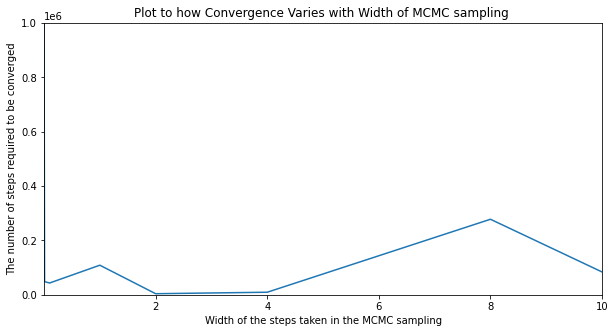

In [9]:
width = np.array([0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 8, 10])
convergence_steps_values = np.empty((9))
for i in range(9):
  _, _, convergence_steps_values[i] = metropolis_algo(width = width[i], original_posterior_mean = posterior_mean) 

print(convergence_steps_values)
#Plotting
plt.figure(figsize=(10,5))
plt.plot(width, convergence_steps_values)
plt.xlabel('Width of the steps taken in the MCMC sampling')
plt.ylabel('The number of steps required to be converged')
plt.xlim(0.001,10)
plt.ylim(0, 1000000)
plt.title('Plot to how Convergence Varies with Width of MCMC sampling ')
plt.show()

In the above graph, we can see that the values of the convergence steps tajken buy the algorithm is implicitly normalized byu the matplotlib. Here, we can understand the convergence was first while the width was close to zero like 0.001 or 0.01 or 0.1. After that as the width increases the convergence speed slightly increases after it reachjes a Global optima at the width of 4. And after that as we increase the width, the convergence speed continiously increasesdue to the high variantion caused by the high MCMC proposal width,which cannot stay at an optimum for a long time.

The efficiency of our MCMC sampling is 0.999
The convergence  of our MCMC sampling is acheived at  1000000
 


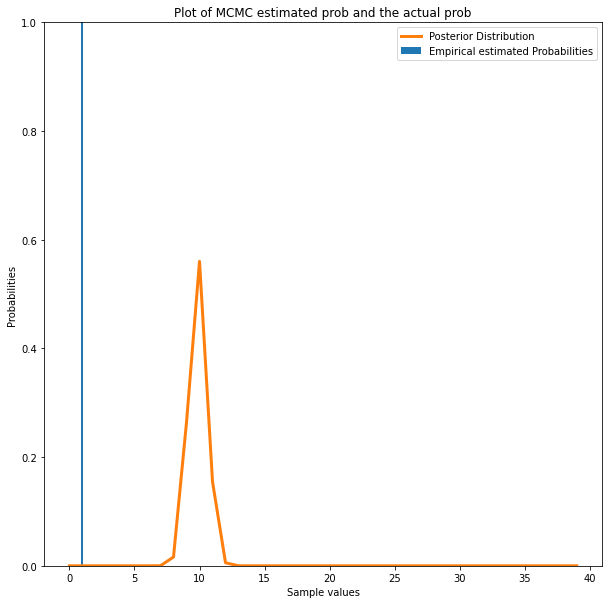

In [10]:
#Use of sub-optimal proposal width and terminating sample too soon
sub_optimal_width = 0.0001
retained_samples, efficiency, convergence_steps =   metropolis_algo(width=sub_optimal_width , original_posterior_mean = posterior_mean, look_back=5, data = data, num_of_trials = 1000000, tol = 0.00001)

print('The efficiency of our MCMC sampling is ' + str(efficiency))
print('The convergence  of our MCMC sampling is acheived at  ' + str(convergence_steps))
print(' ')
#Ploting
plt.figure(figsize=(10,10))
plt.hist(retained_samples, bins=200, label = "Empirical estimated Probabilities", density=True)
plt.xlabel('Sample values')
plt.plot(mu_values, posterior_val, label = "Posterior Distribution", linewidth=3)
plt.ylim(0,1)
plt.ylabel('Probabilities')
plt.title('Plot of MCMC estimated prob and the actual prob')
plt.legend()
plt.show()

In the above plot we can see that how the graph of the estimated distribution of the posterior by MCMC sapling does not reach until the original posterior distribution. Due to the very low sampling width, and prunning the model in a very early steps compared to the width, the MCMC sampling was unable to explorew the whole solution space. Thus, was not able to approximate tje original distribution appropriately. As we can see, in the graph  that we had started our MCMC sampling from the 1, and due to the very low width and stopping the model earlier with respect to the width, most of the values sampled from MCMC is distributed like in the above graph.